In [1]:
import gcdyn.cycles
from gcdyn.cycles import (
    GC,
    cell_div_balanced_proliferator,
    simple_proliferator,
    uniform_mutator,
    binary_proliferator,
)
import gcdyn.replay as replay
from IPython.display import display

In [2]:
fasta_path = "gcreplay_samples/five_seqs.fasta"
seqs = replay.fasta_to_seq_list(fasta_path)

Trees with balanced proliferator, uniform mutator, replay selector

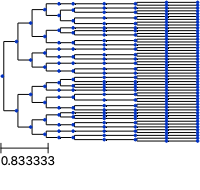

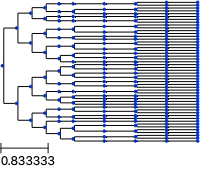

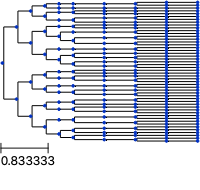

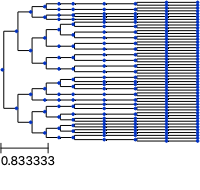

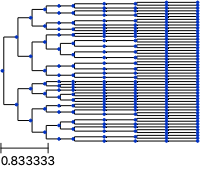

In [3]:
tree_renders = []
replay_cell_div_selector = gcdyn.cycles.ReplaySelector(slope=3.37, y_intercept=1)
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        cell_div_balanced_proliferator,
        uniform_mutator,
        replay_cell_div_selector,
        N0=1,
        Nmax=50,
    )
    gc.simulate(3, enforce_timescale=True)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Trees with balanced proliferator, uniform mutator, uniform selector

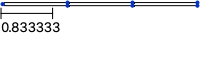

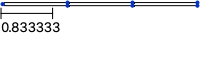

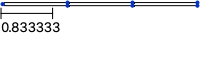

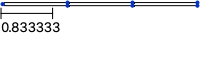

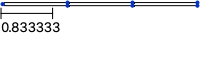

In [4]:
tree_renders = []
uniform_selector = gcdyn.cycles.UniformSelector()
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        cell_div_balanced_proliferator,
        uniform_mutator,
        uniform_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=True)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Trees with simple proliferator, uniform proliferator, replay selector

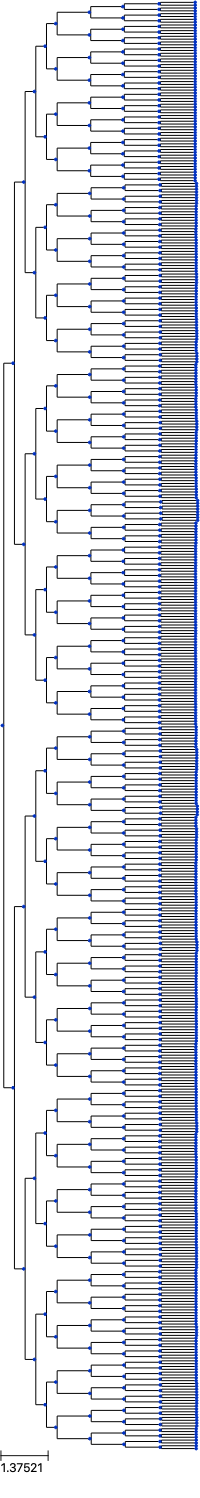

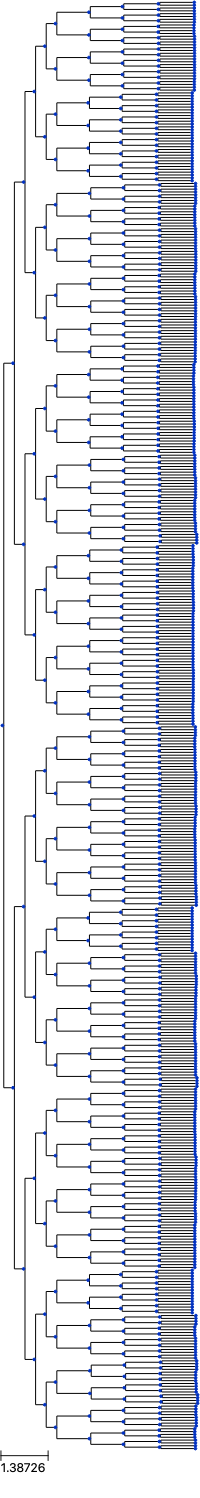

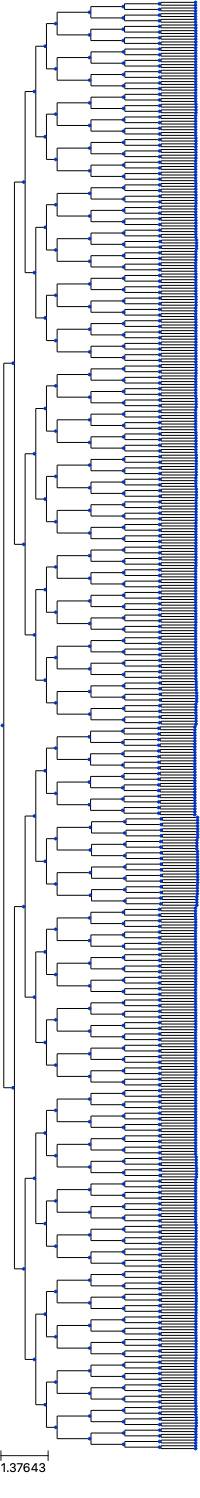

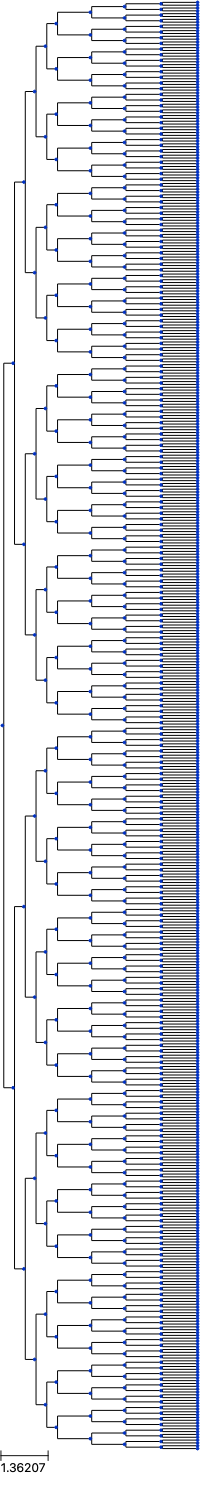

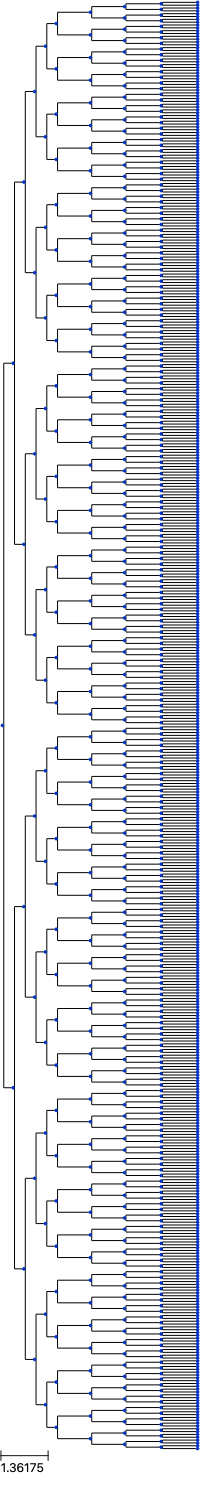

In [5]:
tree_renders = []
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        simple_proliferator,
        uniform_mutator,
        replay_cell_div_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=False)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Binary proliferator, uniform mutator, uniform selector

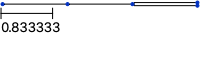

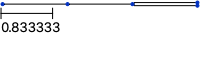

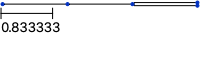

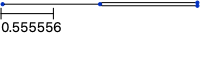

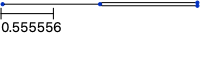

In [6]:
tree_renders = []
for i in range(len(seqs)):
    seq = seqs[i]
    gc = GC(
        seq,
        binary_proliferator,
        uniform_mutator,
        uniform_selector,
        N0=1,
    )
    gc.simulate(3, enforce_timescale=False)
    tree_renders.append(gc.tree.render("%%inline", w=200))

for render in tree_renders:
    display(render)

Look at phenotype trajectory for a simulation of a single cell in a GC

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import seaborn as sns
from matplotlib.colors import SymLogNorm
from ete3 import faces, AttrFace, TreeStyle, NodeStyle


seq = "GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGGAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAGACATCGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAGGAGACAGGGTCAGCGTCACCTGCAAGGCCAGTCAGAATGTGGGTACTAATGTAGCCTGGTGTCAACAGAAACCAGGGCAATCTCCTAAAGCACTGATTTACTCGGCATCCTACAGGTACAGTGGAGTCCCTGATCGCTTCACAGGCAGTGGATCTGGGACAGATTTCACTCTCAGCATCAGCAATGTGCAGTCTGAAGACTTGGCAGAGTATTTCTGTCAGCAATATTACAGCTATCCTGTCACGTTCGGCTCGGGGACTAAGCTAGAAATAAAA"
gc = GC(
    seq,
    cell_div_balanced_proliferator,
    uniform_mutator,
    replay_cell_div_selector,
    N0=1,
    Nmax=50,
)
gc.simulate(3, enforce_timescale=True)

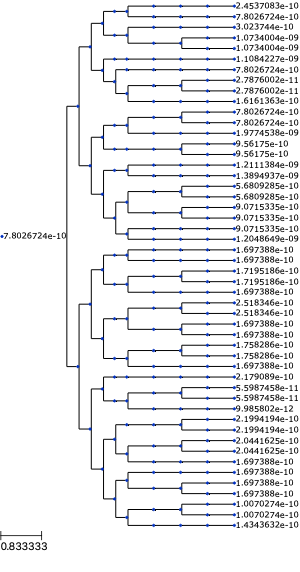

In [12]:
def layout_KD(node):
    if node.is_leaf() or node.is_root():
        faces.add_face_to_node(AttrFace("KD"), node, column=0)


ts = TreeStyle()
ts.layout_fn = layout_KD
gc.tree.render("%%inline", w=300, tree_style=ts)

Plotting trajectory of simulated phenotypes in one simulation with three cycles:

In [ ]:
# Adapted from phenotype-trajectories notebook (https://github.com/matsengrp/gcreplay/blob/main/analysis/phenotype-trajectories.ipynb)

points = []
lines = []
colors = []
sim_df = pd.DataFrame()
norm = SymLogNorm(linthresh=1, vmin=0, vmax=10)
cmap = "viridis"

fig, axes = plt.subplots()

alive_descendants = set(
    node for node in gc.tree.get_descendants() if not node.terminated
)

for node in alive_descendants:
    node_phenotype = getattr(node, "KD")
    points.append((gc.tree.get_distance(node), node_phenotype))
    if node.up is not None:
        parent_phenotype = getattr(node.up, "KD")
        lines.append(
            [
                (gc.tree.get_distance(node.up), parent_phenotype),
                (gc.tree.get_distance(node), node_phenotype),
            ]
        )
lc = mc.LineCollection(lines, colors="k", linewidths=0.3, alpha=0.5, zorder=3)
axes.add_collection(lc)
axes.scatter(
    *zip(*points),
    cmap=cmap,
    alpha=0.8,
    edgecolors="k",
    linewidths=0.2,
    zorder=4,
    norm=norm
)
axes.set_ylabel("KD")
axes.set_xlabel("distance from starting sequence")

In [ ]:
fig, axes = plt.subplots()
points = []
lines = []
for node in gc.tree.traverse():
    node_phenotype = getattr(node, "fitness")
    points.append((gc.tree.get_distance(node), node_phenotype))
    if node.up is not None:
        parent_phenotype = getattr(node.up, "fitness")
        lines.append(
            [
                (gc.tree.get_distance(node.up), parent_phenotype),
                (gc.tree.get_distance(node), node_phenotype),
            ]
        )
lc = mc.LineCollection(lines, colors="k", linewidths=0.3, alpha=0.5, zorder=3)
axes.add_collection(lc)
axes.scatter(
    *zip(*points), cmap=cmap, alpha=0.8, edgecolors="k", linewidths=0.2, zorder=4
)


axes.set_ylabel("t cell help")
axes.set_xlabel("distance from original sequence")